In [544]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import scipy.stats as stats

In [545]:
mon = pd.read_csv("Monday.csv", index_col=[0])

In [546]:
tue = pd.read_csv("Tuesday.csv", index_col=[0])

In [547]:
wed = pd.read_csv("Wedenesday.csv", index_col=[0])

In [548]:
thur = pd.read_csv("Thursday.csv", index_col=[0])

In [549]:
fri = pd.read_csv("Friday.csv", index_col=[0])

In [550]:
arr = ("mon","tue","wed","thu","fri")
count = 0
for i in (mon,tue,wed,thur,fri):
    i["timestamp"]=pd.to_datetime(i["index"])
    i.set_index("timestamp",inplace=True)
    i.drop(columns={"index"}, inplace=True)
    i[arr[count]]=[1 for i in range(0,len(i))]
    i.head()
    count = count+1

#     thur["timestamp"]=pd.to_datetime(thur["index"])
#     thur.set_index("timestamp",inplace=True)
#     thur["count"]=[1 for i in range(0,len(thur))]
#     thur.head()

In [551]:
j = pd.DataFrame()
for i in (mon,tue,wed,thur,fri):
    resampled=i.resample("20Min").sum()
    resampled.index=pd.Series(resampled.index).apply(lambda x : x.time())
    j = pd.concat([j,resampled],axis=1)

In [552]:
c = j.dropna()

In [553]:
c.mean()

mon    2.307692
tue    2.538462
wed    2.923077
thu    2.230769
fri    2.538462
dtype: float64

In [554]:
j.mean()

mon    2.222222
tue    2.400000
wed    2.812500
thu    2.565217
fri    2.142857
dtype: float64

In [555]:
j.count()

mon    18
tue    15
wed    16
thu    23
fri    28
dtype: int64

In [556]:
weighted_average = (j.mean()*j.count()).sum()/j.count().sum()

In [557]:
round(weighted_average,2)

2.4

## Mean frequency in 2 minute intervals for arrival of blue buses is 0.26 buses; or we can expect 0.13 buses a minute

## Conversely, we need to wait an average of 7.69 minutes for the blue bus

In [558]:
import math

In [562]:
roll = pd.DataFrame()
for i in ("mon","tue","wed","thu","fri"):
    roll = pd.concat([roll,c[i].rolling(4).mean()[3:]],axis=1)

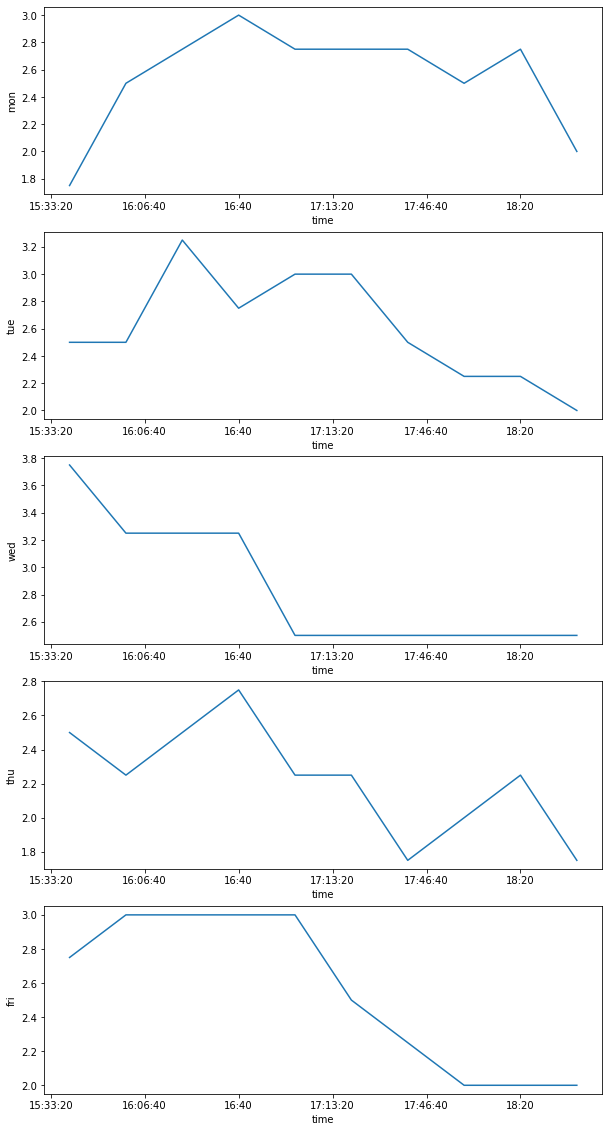

In [563]:
fig, axis = plt.subplots(5,1, figsize=(10,20))
counter=0
for i in ("mon","tue","wed","thu","fri"):
    sb.lineplot(data = roll[i], ax=axis[counter])
    counter=counter+1

## We observe the same general trend, most buses are in the interval from 4pm-5pm, after which their numbers steadily decline into the evening

In [568]:
j = pd.DataFrame()
for i in (mon,tue,wed,thur,fri):
    resampled=i.resample("5Min").sum()
    resampled.index=pd.Series(resampled.index).apply(lambda x : x.time())
    j = pd.concat([j,resampled],axis=1)
c = j.dropna()

<AxesSubplot:xlabel='time'>

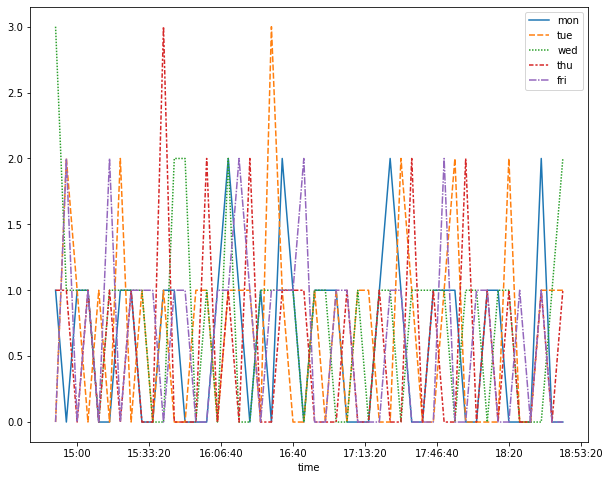

In [574]:
plt.figure(figsize=(10,8))
counter=0
sb.lineplot(data = c)

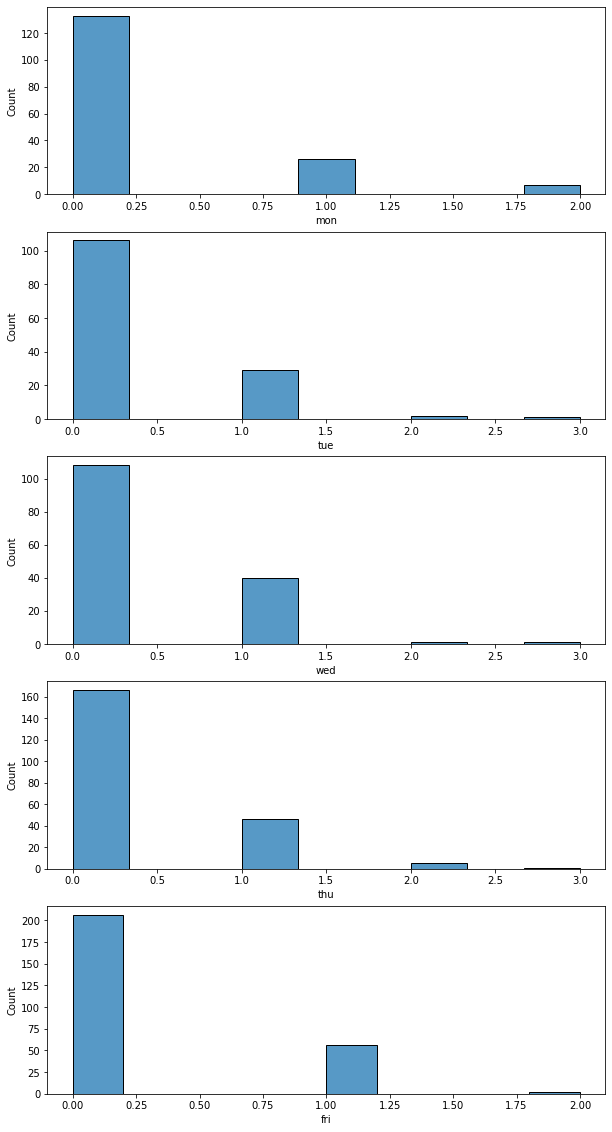

In [578]:
j = pd.DataFrame()
for i in (mon,tue,wed,thur,fri):
    resampled=i.resample("2Min").sum()
    resampled.index=pd.Series(resampled.index).apply(lambda x : x.time())
    j = pd.concat([j,resampled],axis=1)
fig, axis = plt.subplots(5,1, figsize=(10,20))
counter=0
for i in ("mon","tue","wed","thu","fri"):
    sb.histplot(data = j[i], ax=axis[counter])
    counter=counter+1

In [595]:
### Looks like Poisson

## Define Bunching as two buses passing within 1 minute of each other

In [598]:
for i in (mon,tue,wed,thur,fri):
    i =pd.Series(i.sort_values(by="timestamp").index)

In [602]:
count = []
for i in (mon,tue,wed,thur,fri):
    count.append([i[0:len(i)]-i[:len(i-1)]])

In [604]:
mon.sort_values(by="timestamp").index

DatetimeIndex(['2022-03-07 14:54:31.462434', '2022-03-07 15:01:09.915556',
               '2022-03-07 15:07:10.716250', '2022-03-07 15:22:16.809524',
               '2022-03-07 15:27:35.362411', '2022-03-07 15:44:56.838272',
               '2022-03-07 15:46:17.415254',        '2022-03-07 16:05:11',
               '2022-03-07 16:11:19.133333', '2022-03-07 16:12:22.816667',
               '2022-03-07 16:15:46.252299', '2022-03-07 16:26:43.850000',
               '2022-03-07 16:36:43.799656', '2022-03-07 16:36:47.667003',
               '2022-03-07 16:43:52.584058', '2022-03-07 16:54:08.316667',
               '2022-03-07 16:55:58.533333', '2022-03-07 17:01:37.100000',
               '2022-03-07 17:20:07.916667', '2022-03-07 17:27:13.566667',
               '2022-03-07 17:27:15.100000', '2022-03-07 17:34:40.350000',
               '2022-03-07 17:47:05.516667', '2022-03-07 17:54:52.350000',
               '2022-03-07 17:55:11.049306', '2022-03-07 18:14:10.167532',
               '2022-03-0

In [ ]:
#Take differnec and calulate bunching